In [30]:
import pandas  as pd
import numpy   as np
import xgboost as xgb
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import seaborn as sns

In [31]:
data = pd.read_csv("./data/StoneAlgo Retired Diamond Data.csv")
relavent_data = ['shape', 'carat', 'cut', 'color', 'clarity', 'certificateLab', 'polish', 'symmetry', 'fluorescence', 'price']
data = data[relavent_data]
data = data.dropna().copy()
data

,shape,carat,cut,color,clarity,certificateLab,polish,symmetry,fluorescence,price
0,Round,3.01,Very Good,D,VS2,GIA,Very Good ...,Excellent ...,None,96980.26
1,Round,1.26,Excellent,I,SI1,GIA,Excellent ...,Excellent ...,None,7722.58
2,Round,4.03,Very Good,E,VS1,GIA,Excellent ...,Very Good ...,None,239200.00
3,Round,1.86,Excellent,E,VS2,GIA,Excellent ...,Excellent ...,None,27508.00
4,Cushion,3.20,Excellent,G,VS1,GIA,Very Good ...,Good ...,None,53504.69
...,...,...,...,...,...,...,...,...,...,...
167775,Round,2.01,Very Good,M,VVS2,GIA,Excellent ...,Very Good ...,None,8226.19
167776,Round,1.00,Excellent,H,VS1,GIA,Excellent ...,Excellent ...,Strong,5278.99
167778,Cushion,0.40,Excellent,F,VS1,GIA,Excellent ...,Excellent ...,Faint,818.07
167779,Round,1.51,Excellent,E,SI2,GIA,Excellent ...,Excellent ...,Strong,8050.84


In [32]:
data['polish'] = data['polish'].str.strip()
data['symmetry'] = data['symmetry'].str.strip()


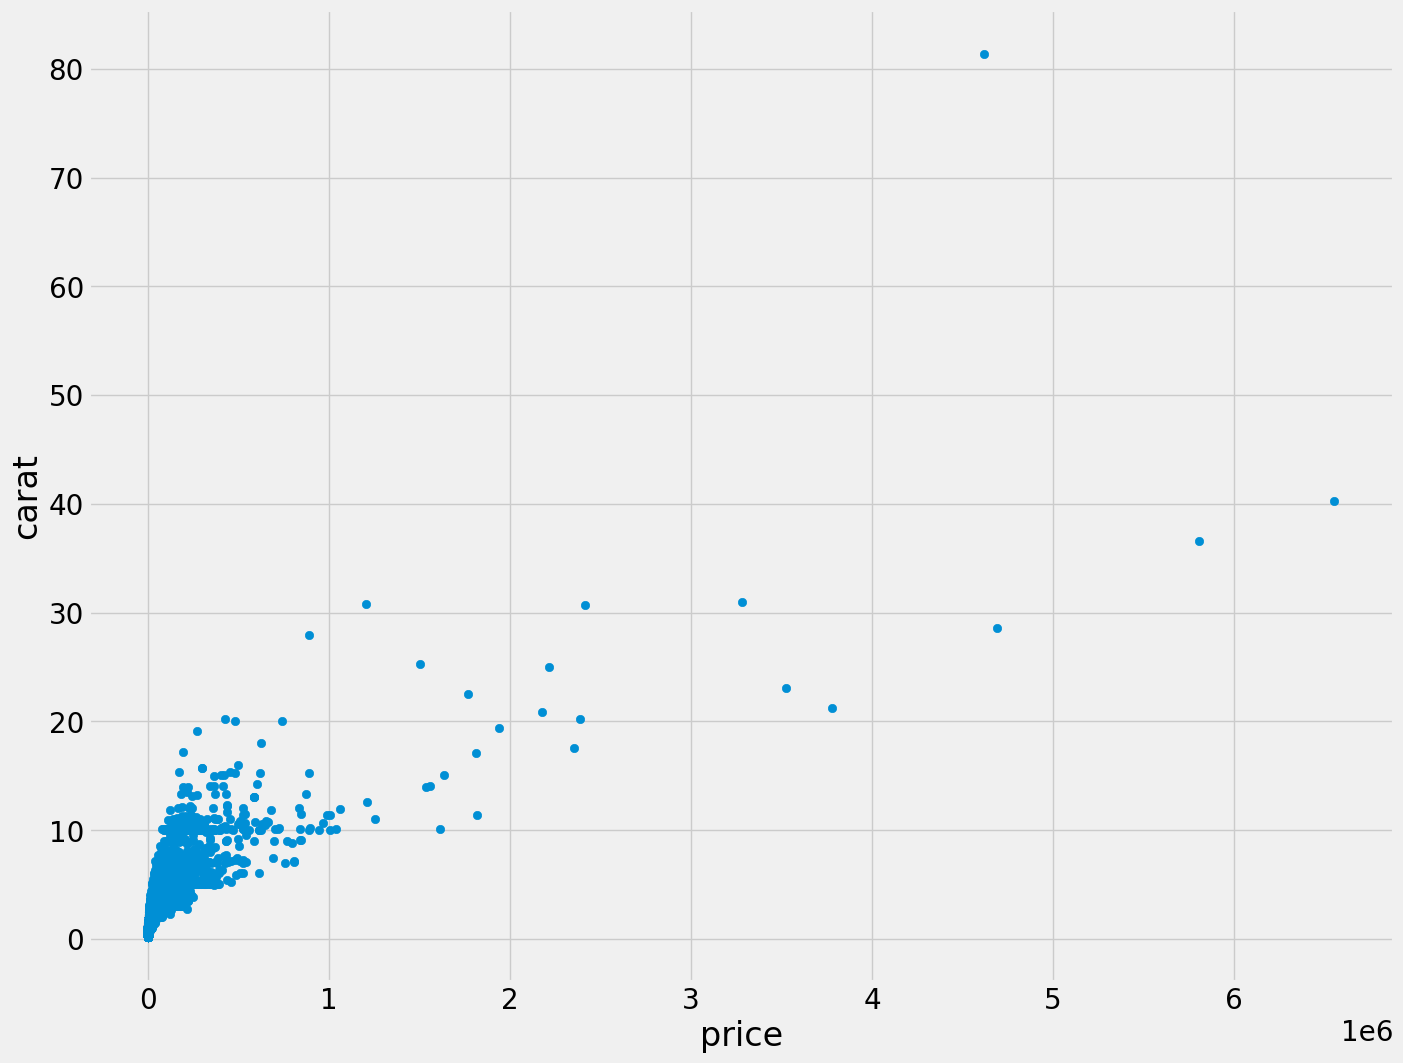

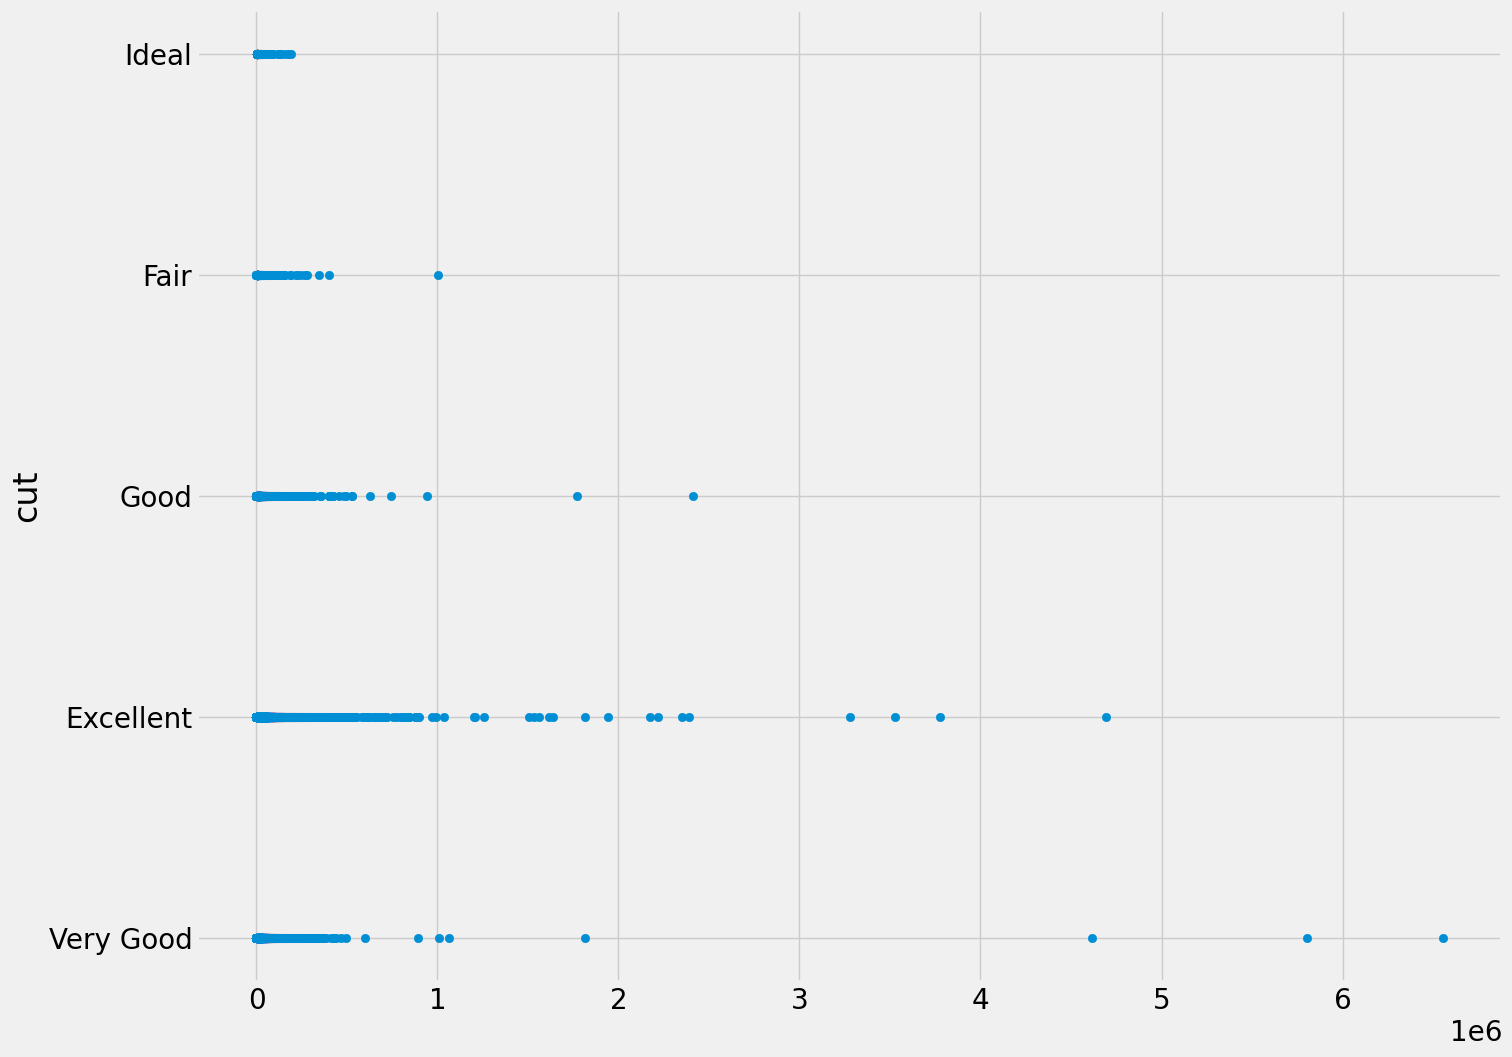

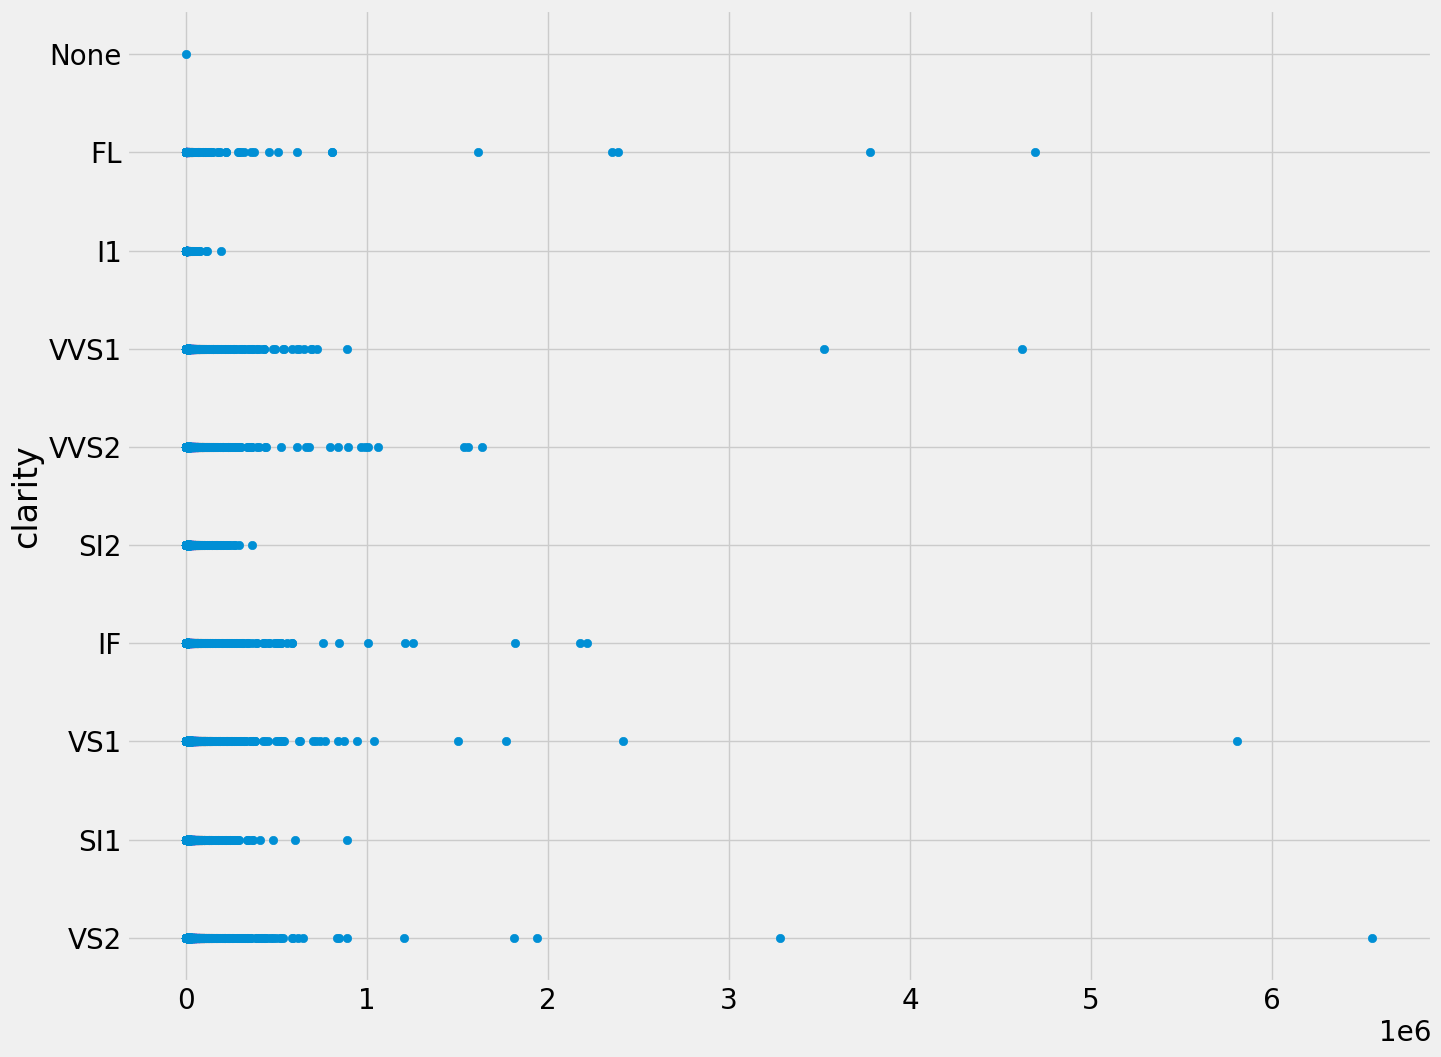

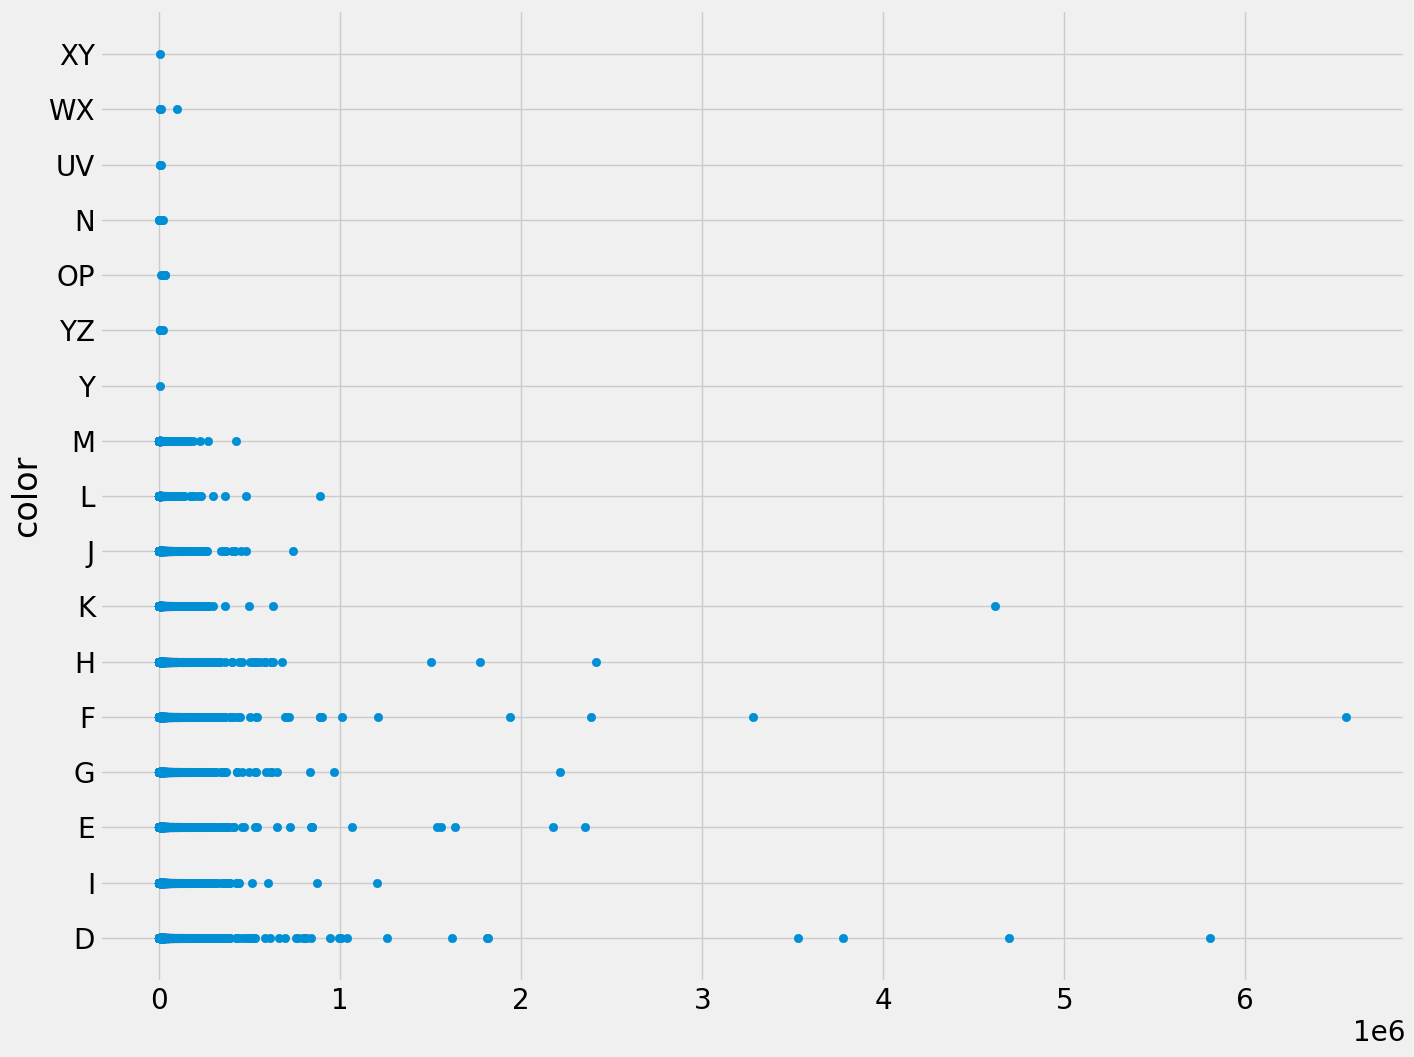

In [33]:
plt.rcParams['figure.figsize'] = [15, 12]

plt.xlabel('price')

plt.ylabel('carat')
plt.scatter(data['price'], data['carat'])
plt.show()

plt.ylabel('cut')
plt.scatter(data['price'], data['cut'])
plt.show() 

plt.ylabel('clarity')
plt.scatter(data['price'], data['clarity'])
plt.show() 

plt.ylabel('color')
plt.scatter(data['price'], data['color'])
plt.show() 


In [34]:
data['certificateLab'].value_counts()

GIA    150850
IGI      9318
HRD       996
AGS       655
B2C         5
Name: certificateLab, dtype: int64

In [35]:
data = data.loc[data['certificateLab'] == "GIA"].copy()
del data['certificateLab']

In [36]:
shape = {'Round': 11,
 'Cushion': 10,
 'Princess': 9,
 'Emerald': 8,
 'Oval': 7,
 'Pear': 6,
 'Marquise': 5,
 'Radiant': 4,
 'Heart': 3,
 'Asscher': 2,
 'CM': 1}

dict(data['shape'].value_counts())

{'Round': 101387,
 'Cushion': 11181,
 'Princess': 8332,
 'Emerald': 6796,
 'Oval': 6234,
 'Pear': 6159,
 'Marquise': 3158,
 'Radiant': 3153,
 'Heart': 2522,
 'Asscher': 1867,
 'CM': 61}

In [37]:
cut = {'Excellent': 5,
 'Very Good': 4,
 'Good': 3,
 'Fair': 2,
 'Ideal': 5.5}

dict(data['cut'].value_counts())

{'Excellent': 97489, 'Very Good': 35251, 'Good': 15140, 'Fair': 2970}

In [38]:
clarity = {'VS2': 4,
 'VS1': 5,
 'SI1': 3,
 'VVS2': 6,
 'SI2': 2,
 'VVS1': 7,
 'IF': 8,
 'I1': 1,
 'FL': 9,
 'None': 0}

dict(data['clarity'].value_counts())

{'VS1': 26798,
 'VS2': 26703,
 'SI1': 25591,
 'VVS2': 20559,
 'VVS1': 18786,
 'SI2': 18174,
 'IF': 9198,
 'I1': 4631,
 'FL': 409,
 'None': 1}

In [39]:
color = {'D': 15,
 'E': 14,
 'F': 13,
 'G': 12,
 'H': 11,
 'I': 10,
 'J': 9,
 'K': 8,
 'L': 7,
 'M': 6,
 'N': 5,
 'YZ': 1,
 'WX': 2,
 'OP': 4,
 'UV': 3,
 'Y': 1.5}

dict(data['color'].value_counts())

{'E': 25264,
 'F': 24275,
 'D': 24158,
 'G': 23467,
 'H': 18522,
 'I': 14800,
 'J': 9581,
 'K': 5611,
 'L': 2802,
 'M': 2343,
 'N': 10,
 'YZ': 7,
 'WX': 4,
 'OP': 3,
 'UV': 2,
 'Y': 1}

In [40]:
polish = {'Excellent': 5,
 'Very Good': 4,
 'Good': 3,
 'Ideal': 5.5,
 'Fair': 2,
 'Very Good-Excel': 4.5,
 'Good-Very Good': 3.5}

dict(data['polish'].value_counts())

{'Excellent': 107558,
 'Very Good': 34382,
 'Good': 8778,
 'Fair': 117,
 'Ideal': 11,
 'Very Good-Excel': 3,
 'Good-Very Good': 1}

In [41]:
symmetry = {'Excellent': 5,
 'Very Good': 4,
 'Good': 3,
 'Fair': 2,
 'Ideal': 5.5,
 'Poor': 1}

dict(data['symmetry'].value_counts())

{'Excellent': 78151,
 'Very Good': 51826,
 'Good': 19139,
 'Fair': 1717,
 'Poor': 14,
 'Ideal': 3}

In [42]:
fluorescence = {'None': 5,
 'Faint': 4,
 'Medium': 3,
 'Strong': 2,
 'Very Slight': 4.5,
 'Very Strong': 1,
 'Slight': 4,
 'Medium Blue': 3,
 'Strong Blue': 2,
 'Very Strong Blue': 1,
 'Medium White': 3}

dict(data['fluorescence'].value_counts())

{'None': 109470,
 'Faint': 21098,
 'Medium': 12907,
 'Strong': 6437,
 'Very Strong': 550,
 'Medium Blue': 230,
 'Strong Blue': 119,
 'Very Strong Blue': 26,
 'Slight': 12,
 'Medium White': 1}

In [43]:
data['cut'].replace(cut, inplace=True)
data['clarity'].replace(clarity, inplace=True)
data['color'].replace(color, inplace=True)
data['polish'].replace(polish, inplace=True)
data['symmetry'].replace(symmetry, inplace=True)
data['fluorescence'].replace(fluorescence, inplace=True)

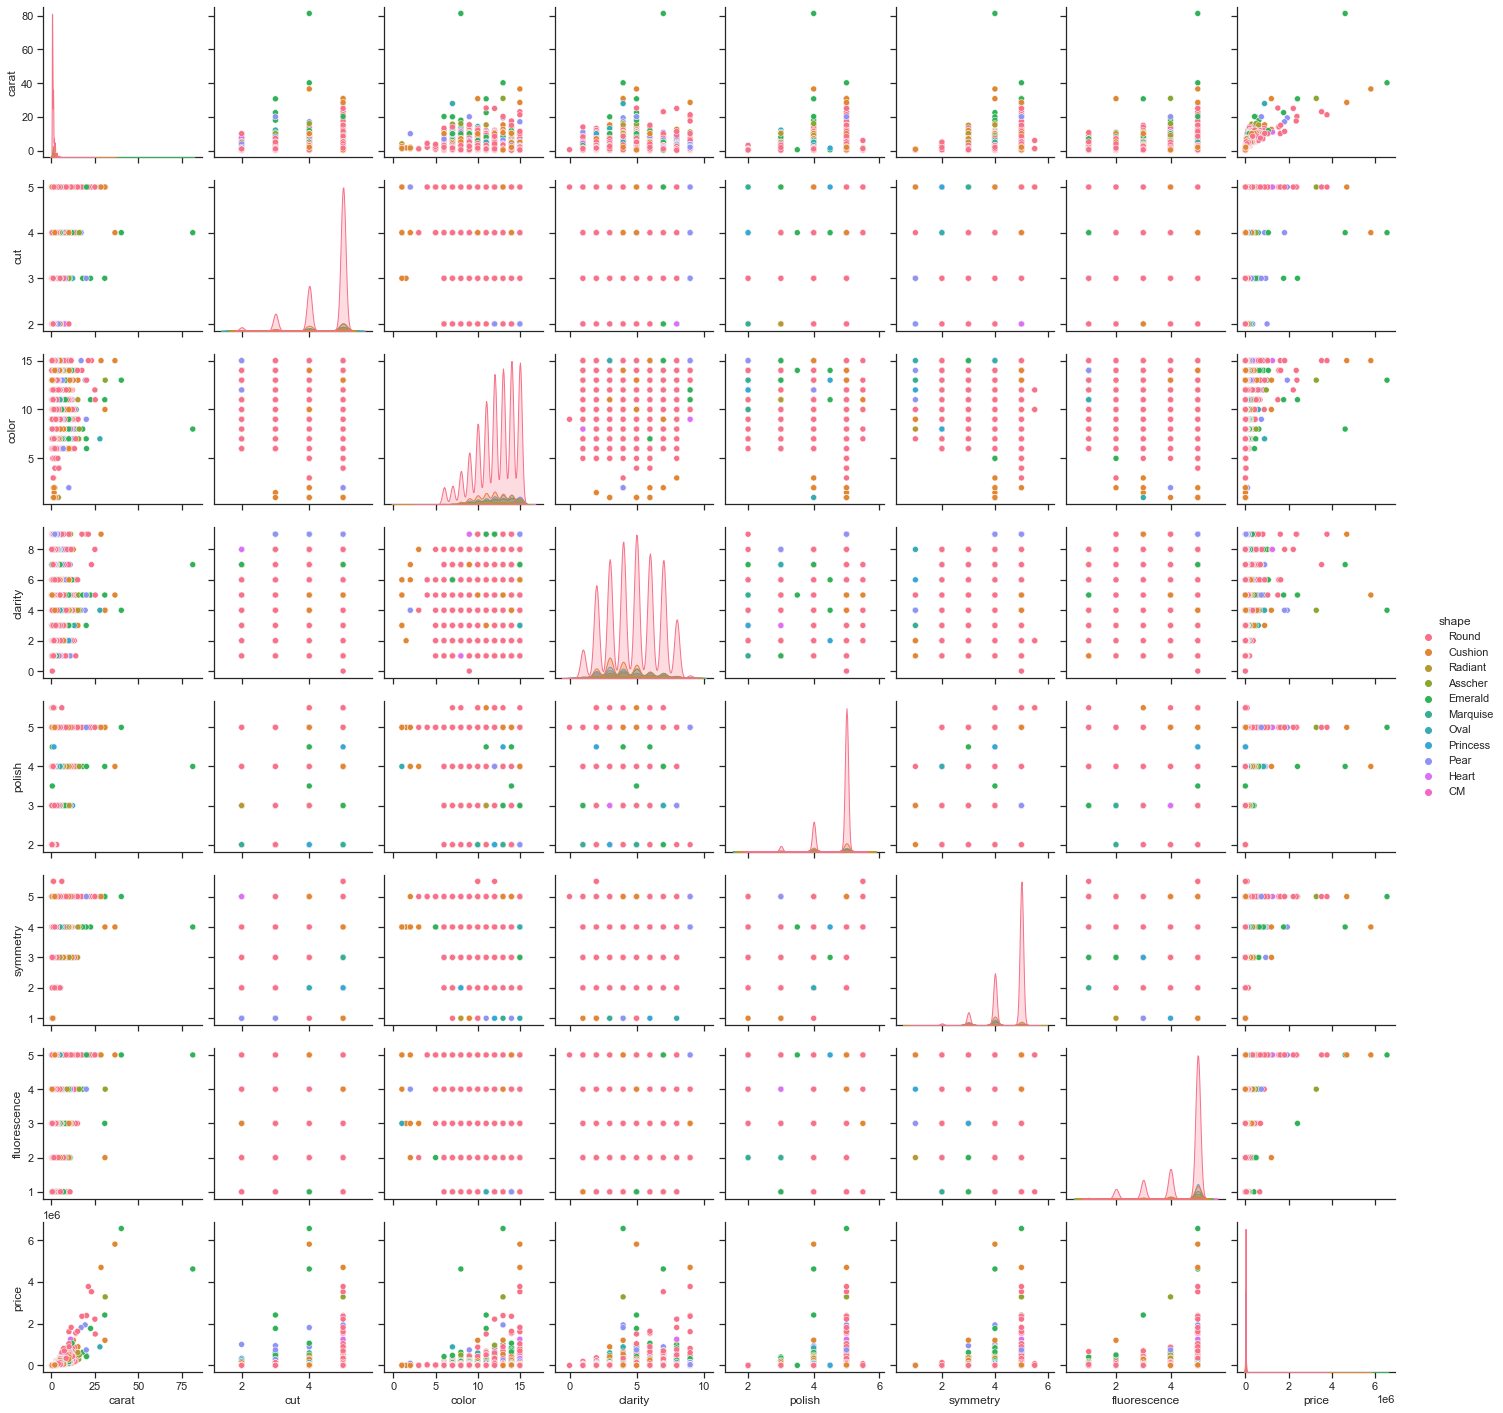

In [15]:
# plot scatter matrix using seaborn
sns.set_theme(style="ticks")
sns.pairplot(data, hue='shape')
plt.savefig('StoneAlgo_data.png', dpi=600)

In [44]:
data['shape'].replace(shape, inplace=True)

# Predict Prices

In [45]:
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold, train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [46]:
#define predictor and response variables
X = data[['shape', 'carat', 'cut', 'color', 'clarity', 'polish', 'symmetry', 'fluorescence']]
y = data[['price']]

# Linear Regression

In [47]:
#split the dataset into training (75%) and testing (25%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0) 

linear = LinearRegression().fit(scale(X_train), y_train)
#linear = LinearRegression().fit(X_train, y_train) 

In [48]:
#calculate RMSE
pred = linear.predict(scale(X_test))
#pred = linear.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred))) # / len(y_test)

RMSE: 34598.783423034365


# PCA Regression

In [24]:
#scale predictor variables
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

Text(0.5, 1.0, 'Price')

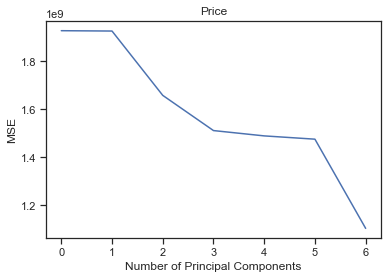

In [25]:
#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), y, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 7):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('Price')

In [26]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 28.63,  44.37,  57.5 ,  69.58,  80.24,  88.88,  95.72, 100.  ])

In [28]:
#split the dataset into training (75%) and testing (25%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=0) 

#scale the training and testing data
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,0:6]

#train PCR model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,0:6], y_train)

#calculate RMSE
pred = regr.predict(X_reduced_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred))) # / len(y_test)

RMSE: 35082.819030845276


# K-Nearest Neighbors Regression

In [49]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

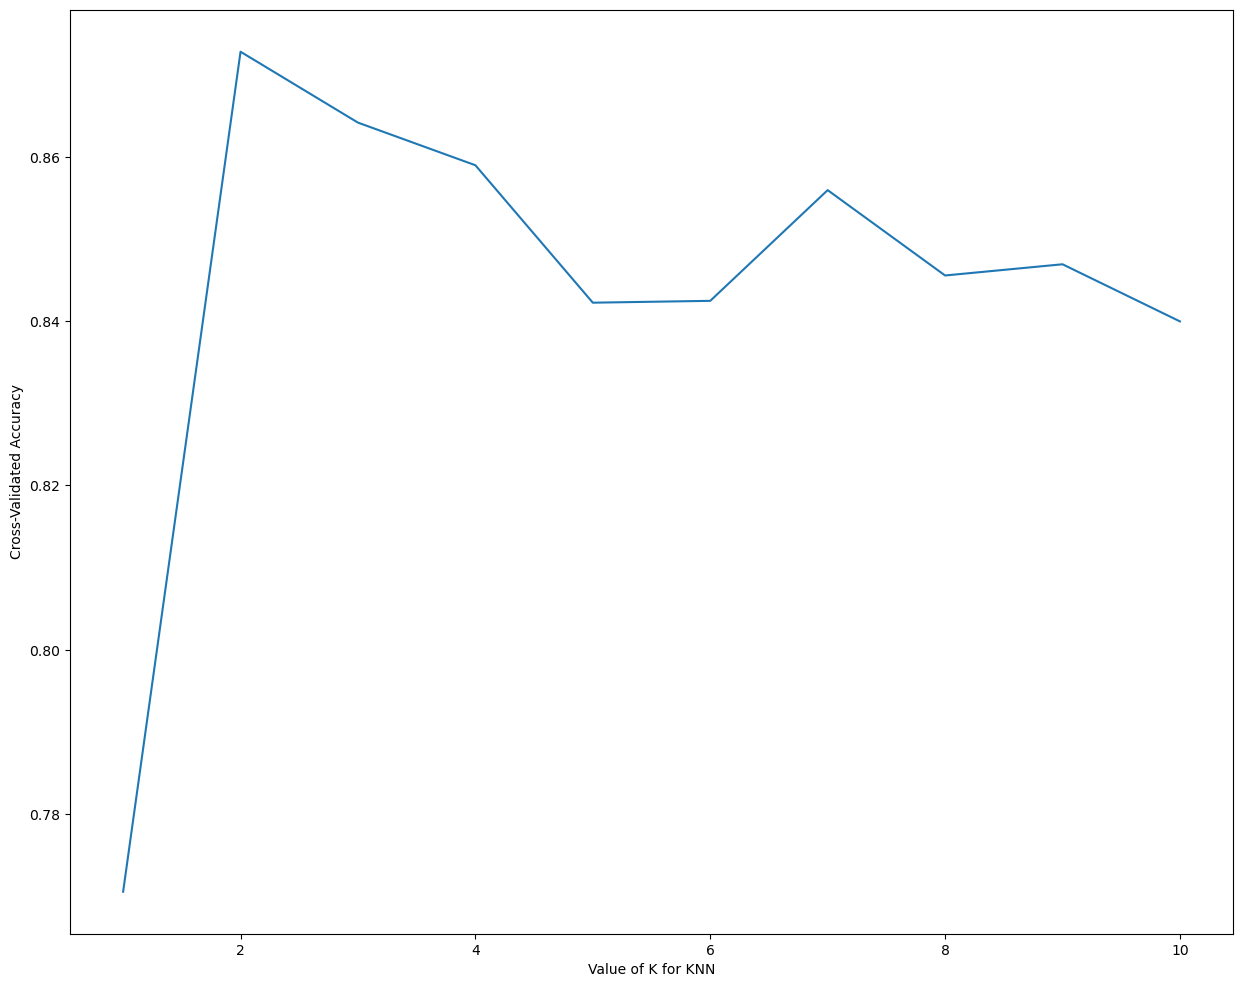

In [21]:
# choose k between 1 to 31
k_range = range(1, 11)
k_scores = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)
    k_scores.append(scores.mean())
    
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [50]:
#split the dataset into training (75%) and testing (25%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=0) 


#train PCR model on training data 
knnr = KNeighborsRegressor(n_neighbors=3)
knnr.fit(X_train, y_train)

#calculate RMSE
pred = knnr.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred))) # / len(y_test)

RMSE: 16553.582487140848


# XGBoost Regression

In [51]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0)

In [35]:
xgb1 = XGBRegressor()
parameters = {
              'objective':['reg:squarederror'],
              'learning_rate': [.0001, 0.001, .01],
              'max_depth': [3, 5, 7],
              'min_child_weight': [3,5,7],
              'subsample': [0.1,0.5,1.0],
              'colsample_bytree': [0.1, 0.5, 1.0],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 3,
                        n_jobs = -1,
                        verbose=0)

xgb_grid.fit(X_train, y_train)

xgb_cv = (xgb_grid.best_estimator_)

eval_set = [(X_train, y_train),
            (X_val, y_val)]

xgb = xgb_cv.fit(
    X_train,
    y_train,
    eval_set=eval_set,
    eval_metric='mae',
    early_stopping_rounds=50,
    verbose=False)

print("MAE:", mean_absolute_error(y_val, xgb.predict(X_val)))
print("MSE:", mean_squared_error(y_val, xgb.predict(X_val)))
print("R2:", r2_score(y_val, xgb.predict(X_val)))

C:\Users\Chintu\AppData\Local\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Chintu\AppData\Local\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


MAE: 1194.0592202002674
MSE: 717080732.671449
R2: 0.7709282245335141


In [36]:
best_params = xgb_grid.best_params_
print("Best Params for XGBoost Regressor: ", xgb_grid.best_params_)

Best Params for XGBoost Regressor:  {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 500, 'objective': 'reg:squarederror', 'subsample': 0.5}


In [52]:
best_params = {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 500, 'objective': 'reg:squarederror', 'subsample': 1.0}

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=0) 

xgbr = XGBRegressor(learning_rate = best_params["learning_rate"],
                           n_estimators  = best_params["n_estimators"],
                           max_depth     = best_params["max_depth"],
                           objective = best_params["objective"],
                           colsample_bytree = best_params["colsample_bytree"],
                           subsample = best_params["subsample"],
                           min_child_weight = best_params["min_child_weight"],
                           eval_metric='rmse')

xgbr.fit(X_train, y_train)

#calculate RMSE
pred = xgbr.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred))) # / len(y_test)

RMSE: 13646.200996447844


# XGBoost Regression Feature Importance

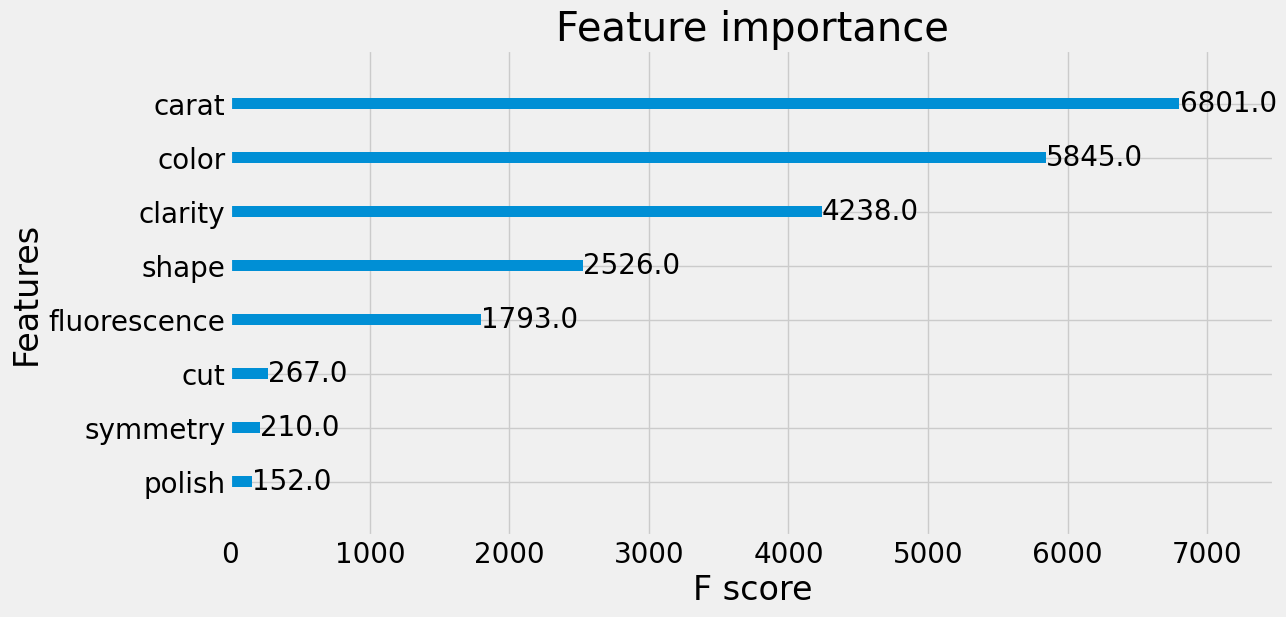

<Figure size 1500x1200 with 0 Axes>

In [54]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 20})

fig, ax = plt.subplots(figsize=(12,6))
plot_importance(xgbr, max_num_features=8, ax=ax)
plt.show()
plt.savefig('xgbr_feature_StoneAlgo.png')

# Save Model

In [55]:
import pickle
with open('linear_StoneAlgo.pkl', 'wb') as f:
    pickle.dump(linear, f)
with open('knnr_StoneAlgo.pkl', 'wb') as f:
    pickle.dump(knnr, f)

xgbr.save_model('xgbr_StoneAlgo.json')